In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download('ETH-USD', start="2022-2-1",end="2022-3-1", interval = '60m')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-31 13:00:00+00:00,2538.824219,2562.564941,2528.861328,2559.873047,2559.873047,0
2022-01-31 14:00:00+00:00,2559.621338,2574.632568,2556.158936,2574.632568,2574.632568,180722688
2022-01-31 15:00:00+00:00,2575.358887,2625.527344,2575.358887,2621.887451,2621.887451,990110720
2022-01-31 16:00:00+00:00,2621.142090,2677.665771,2619.742188,2677.665771,2677.665771,603067392
2022-01-31 17:00:00+00:00,2677.790039,2689.007324,2673.295898,2687.207764,2687.207764,664922112
...,...,...,...,...,...,...
2022-02-28 08:00:00+00:00,2636.332031,2649.649414,2626.337158,2629.909912,2629.909912,147726336
2022-02-28 09:00:00+00:00,2630.000977,2640.375244,2627.029053,2635.580078,2635.580078,0
2022-02-28 10:00:00+00:00,2632.450439,2640.104736,2622.762451,2638.520752,2638.520752,0


## Defining our indicators

In [4]:
df['50EMA'] = df.Close.rolling(50).mean()
df['200EMA'] = df.Close.rolling(200).mean()

In [5]:
df.dropna(inplace = True)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume,50EMA,200EMA
Datetime,,,,,,,,
2022-02-08 20:00:00+00:00,3051.184326,3113.508789,3050.063477,3113.382812,3113.382812,429040640,3095.106470,2883.483938
2022-02-08 21:00:00+00:00,3113.703369,3122.780029,3107.790527,3117.403564,3117.403564,0,3097.428345,2886.271591
2022-02-08 22:00:00+00:00,3117.333740,3120.022461,3104.908203,3111.766602,3111.766602,57899008,3099.925669,2888.957261
2022-02-08 23:00:00+00:00,3112.037109,3132.516357,3112.037109,3122.739258,3122.739258,158974976,3102.439023,2891.461520
2022-02-09 00:00:00+00:00,3121.182617,3128.282715,3110.935547,3126.197021,3126.197021,0,3105.122612,2893.704176
...,...,...,...,...,...,...,...,...
2022-02-28 08:00:00+00:00,2636.332031,2649.649414,2626.337158,2629.909912,2629.909912,147726336,2727.902983,2652.259613
2022-02-28 09:00:00+00:00,2630.000977,2640.375244,2627.029053,2635.580078,2635.580078,0,2724.875249,2651.731301
2022-02-28 10:00:00+00:00,2632.450439,2640.104736,2622.762451,2638.520752,2638.520752,0,2722.508872,2651.322081


## Coding the strategy

In [7]:
open_pos = False

In [8]:
buys, sells = [],[]
buydates, selldates = [],[]

In [9]:
for i in range(len(df)):
    if df['50EMA'][i] > df['200EMA'][i]:
        if open_pos == False:
            
            buys.append(i)
            buydates.append(df.iloc[i].name)
            
            open_pos = True
            
    elif df['50EMA'][i] < df['200EMA'][i]:
        if open_pos == True:
            
            sells.append(i)
            selldates.append(df.iloc[i].name)
            
            open_pos = False

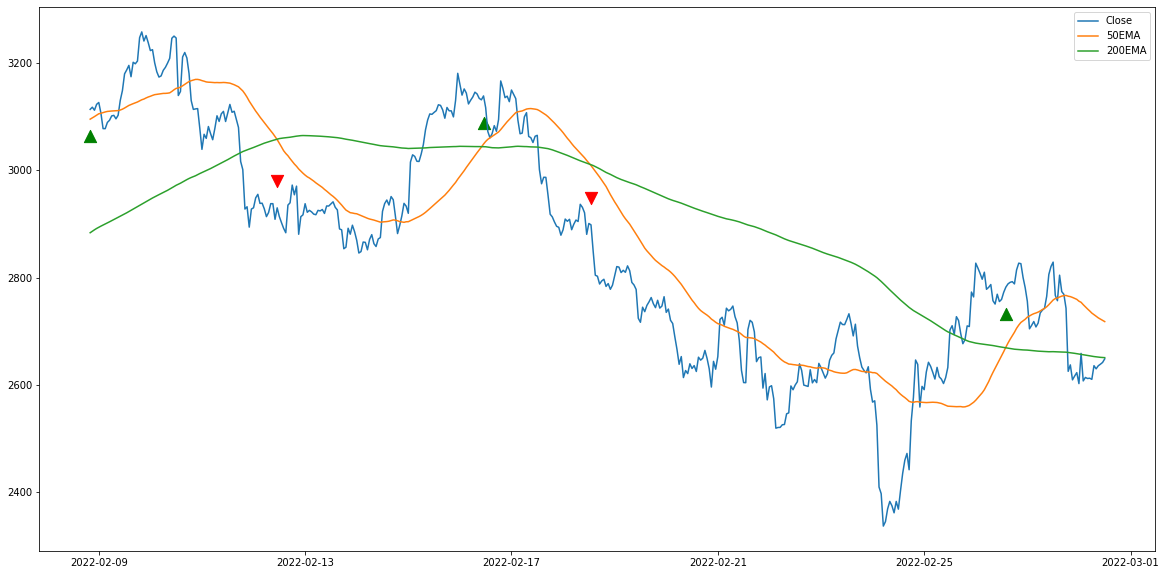

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df[['Close','50EMA','200EMA']])
plt.legend(['Close','50EMA','200EMA'])

#plotting buy signals

plt.scatter(buydates, df.iloc[buys].Close - 50, marker='^',color='g', s = 150)
plt.scatter(selldates, df.iloc[sells].Close + 50, marker='v',color='r', s = 150)


## Calculating the PnL Statement

In [11]:
sells

[87, 233]

In [12]:
buys = buys[:-1]

In [13]:
buyprice, sellprice = [], []

# Because next day open we buy!
for i in buys:
    buyprice.append(df.iloc[i+1].Close)
    
for i in sells:
    sellprice.append(df.iloc[i+1].Close)

In [14]:
profitdf = pd.DataFrame()

In [15]:
profitdf['SellPrice'] = sellprice
profitdf['BuyPrice'] = buyprice
profitdf['Profit'] = profitdf['SellPrice']-profitdf['BuyPrice']

In [16]:
profitdf.Profit

0   -203.770752
1   -267.178467
Name: Profit, dtype: float64

In [17]:
profitdf.Profit.sum()

-470.94921875

In [18]:
profitdf.Profit.sum()/2800*100

-16.819614955357142

In [19]:
#Winrate

profitdf.Profit > 0

0    False
1    False
Name: Profit, dtype: bool

In [20]:
print("You have a : " + str(round(sum(profitdf.Profit > 0)/len(profitdf.Profit)*100,2)) + '% Winrate!!!')

You have a : 0.0% Winrate!!!
